In [1]:
import pandas as pd

In [2]:
import numpy as np

In [2]:
# lectura de datos
df_2021_2023 = pd.read_csv('documentos/completos/df_total.csv', sep=';', index_col='TimeStamp')

In [3]:
df_2021_2023.head()

,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,escoria_FE304,mb_cu
TimeStamp,,,,,,,,,,,,
01-07-2021 0:04,0.0,21.0,NaN,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
01-07-2021 0:09,0.0,21.0,NaN,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
01-07-2021 0:14,0.0,21.0,NaN,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
01-07-2021 0:19,0.0,21.0,NaN,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0
01-07-2021 0:24,0.0,21.0,NaN,0.0,0.0,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0


In [4]:
df_2021_2023['proceso'] = 0
df_2021_2023['TASA_alimentacion_conc'].fillna(0, inplace=True)

In [5]:
i = 1
estado = 0
for indice, columna in df_2021_2023.iterrows():
    if columna['TASA_alimentacion_conc'] != 0 and estado == 0:
        df_2021_2023.loc[indice, 'proceso'] = i
        estado = columna['TASA_alimentacion_conc']
    if columna['TASA_alimentacion_conc'] != 0 and estado != 0:
        df_2021_2023.loc[indice, 'proceso'] = i
        estado = columna['TASA_alimentacion_conc']
    if columna['TASA_alimentacion_conc'] == 0 and estado != 0:
        i = i + 1
        estado = columna['TASA_alimentacion_conc']
    if columna['TASA_alimentacion_conc'] == 0 and estado == 0:
        estado = columna['TASA_alimentacion_conc']

In [26]:
df_2021_2023.to_csv('documentos/completos/df_total_proceso.csv')

In [27]:
df_2021_2023[df_2021_2023['TASA_alimentacion_conc']!=0]

,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,escoria_FE304,mb_cu,proceso
TimeStamp,,,,,,,,,,,,,
26-07-2021 14:44,359.730726,22.186288,113.178862,0.002296,0.003375,0.000092,0.000092,26-07-2021,29.600000,24.200001,37.299999,0.000000,1
26-07-2021 14:49,504.311401,35.242785,53.813225,0.002406,0.003394,0.000092,0.000092,26-07-2021,29.600000,24.200001,37.299999,0.000000,1
26-07-2021 14:54,524.144736,38.554727,69.119440,0.002319,5.669296,0.000092,0.000092,26-07-2021,29.600000,24.200001,37.299999,0.000000,1
26-07-2021 14:59,520.089897,38.450061,62.887104,0.002703,6.209809,0.000092,0.000092,26-07-2021,29.600000,24.200001,37.299999,0.000000,1
26-07-2021 15:04,544.158908,37.720190,78.031567,0.002417,4.597235,0.000092,0.000092,26-07-2021,29.600000,24.200001,37.299999,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11-06-2023 16:29,450.183881,42.330407,47.216157,5.500005,0.003437,1222.452710,1264.359680,11-06-2023,35.599998,25.200001,14.700000,68.720001,1021
11-06-2023 16:34,455.722756,41.538631,46.876279,5.540671,0.003412,1222.450317,1264.357288,11-06-2023,35.599998,25.200001,14.700000,68.720001,1021
11-06-2023 16:39,481.885285,41.644542,46.156755,5.489228,0.003514,1222.446423,1264.344666,11-06-2023,35.599998,25.200001,14.700000,68.720001,1021


In [7]:
df_2021_2023 = pd.read_csv('documentos/completos/df_total_proceso.csv')

In [8]:
df_2021_2023

,TimeStamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,escoria_FE304,mb_cu,proceso
0,01-07-2021 0:04,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0,0
1,01-07-2021 0:09,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0,0
2,01-07-2021 0:14,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0,0
3,01-07-2021 0:19,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0,0
4,01-07-2021 0:24,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206322,20-06-2023 13:39,0.0,21.0,0.0,0.002237,0.003333,0.000092,0.000092,20-06-2023,0.0,0.0,NaN,NaN,0
206323,20-06-2023 13:44,0.0,21.0,0.0,0.002224,0.003468,0.000092,0.000092,20-06-2023,0.0,0.0,NaN,NaN,0
206324,20-06-2023 13:49,0.0,21.0,0.0,0.002239,0.003187,0.000092,0.000092,20-06-2023,0.0,0.0,NaN,NaN,0
206325,20-06-2023 13:54,0.0,21.0,0.0,0.002208,0.003252,0.000092,0.000092,20-06-2023,0.0,0.0,NaN,NaN,0


In [9]:
def df_lag(max_lag, serie1, serie2):
    cross_corr_results = DataFrame(index=range(0, max_lag+1), columns=['Cross-Correlation'])
    for lag in range(0, max_lag+1):
        shifted_other_series = serie2.shift(lag)
        cross_corr = serie1.corr(shifted_other_series)
        cross_corr_results.loc[lag] = cross_corr
    return cross_corr_results

In [10]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

In [ ]:
### por periodo

In [11]:
lag = 30
df_todo = DataFrame(DataFrame(index=range(0, lag+1)))
for dias in df_2021_2023['proceso'].unique():
    df = df_2021_2023[df_2021_2023['proceso'] == dias]
    serie1 = df.loc[:,'Flujo aire']#Alimentacion_con
    serie2 = df.loc[:,'t MB']
    df_lags = df_lag(lag, serie1, serie2)
    #
    df_lags.rename(columns={'Cross-Correlation':dias}, inplace=True)
    df_todo = pd.concat([df_todo, df_lags], axis=1)
    #df_todo[dias] = df_lags['Cross-Correlation']

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

In [34]:
df_todo.dropna(axis=1)

,0,6,8,9,10,14,16,18,19,21,...,1006,1007,1009,1010,1011,1012,1013,1014,1015,1020
0,0.018398,0.695528,0.271896,-0.024372,0.805136,-0.262159,-0.209558,-0.404686,0.167133,-0.763012,...,0.190719,0.184768,-0.167193,0.308453,-0.521554,0.381826,0.095478,0.055112,0.174216,-0.525994
1,0.018446,0.708066,0.266581,-0.007279,0.783368,-0.393951,-0.20691,-0.479339,0.159397,-0.774787,...,0.266554,0.20896,-0.013575,0.322498,-0.46096,0.40166,-0.002254,0.026122,0.288738,-0.519412
2,0.018853,0.728122,0.268286,-0.082269,0.759229,-0.27862,-0.20071,-0.582546,0.200317,-0.783925,...,0.308856,0.335882,-0.180576,0.268517,-0.532898,0.431529,0.021528,0.003496,0.016697,-0.463828
3,0.01909,0.742873,0.263477,-0.069062,0.735071,-0.233129,-0.185779,-0.607529,0.261408,-0.790863,...,0.239717,0.358147,-0.156214,0.25684,-0.505884,0.429743,-0.120667,-0.029145,-0.003886,-0.398098
4,0.019564,0.753708,0.260502,-0.063579,0.712517,-0.152081,-0.176294,-0.613878,0.254641,-0.800186,...,0.258312,0.255169,-0.042476,0.116886,-0.473188,0.45203,-0.104733,-0.056294,0.052289,-0.283909
5,0.019289,0.76221,0.260845,-0.046421,0.686524,-0.255017,-0.163823,-0.577695,0.25408,-0.810611,...,0.259584,0.396655,-0.112376,0.030036,-0.315979,0.491487,-0.171705,-0.073148,-0.138194,-0.208969
6,0.019761,0.770381,0.259312,-0.048268,0.657153,-0.328517,-0.136417,-0.547444,0.252479,-0.820985,...,0.270272,0.508569,-0.084623,-0.041856,-0.375952,0.469775,-0.162064,-0.107332,-0.176063,-0.117052
7,0.020027,0.774657,0.255992,-0.043923,0.623889,-0.32301,-0.117859,-0.590173,0.251365,-0.82915,...,0.290584,0.12612,0.095811,-0.102421,-0.466264,0.438029,-0.180033,-0.133061,-0.280027,-0.088498
8,0.020404,0.759877,0.25564,0.006291,0.590528,-0.430746,-0.103807,-0.614096,0.249664,-0.834816,...,0.313795,0.323966,-0.079489,-0.142455,-0.409628,0.44121,-0.216112,-0.144168,-0.395239,-0.162625
9,0.02147,0.720735,0.256811,-0.03415,0.551852,-0.397895,-0.103922,-0.561059,0.245521,-0.840552,...,0.286618,0.289247,-0.204531,-0.107212,-0.260537,0.446627,-0.117798,-0.16066,-0.43921,-0.12235


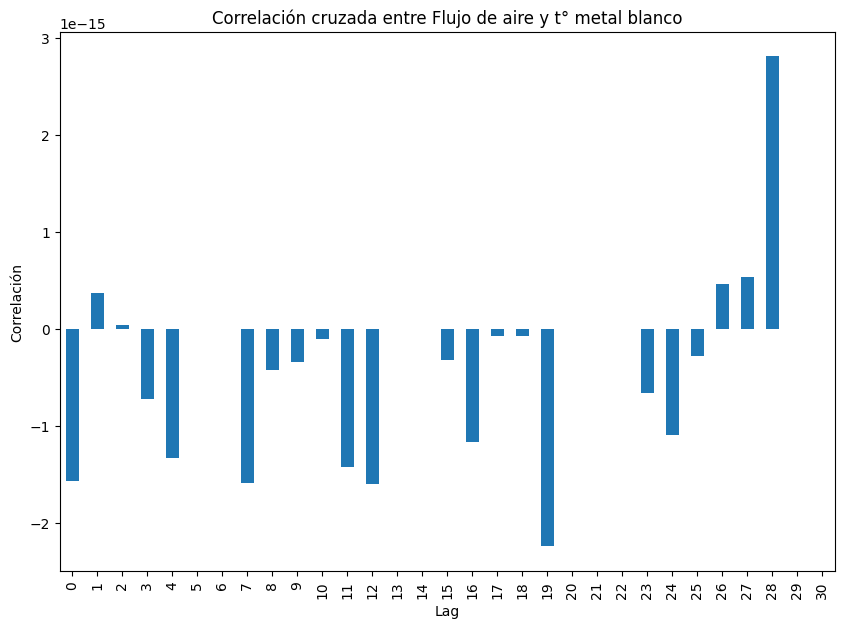

In [35]:
# Graficar la correlación cruzada
df_todo.loc[:,5].plot(kind='bar', ax=pyplot.gca(), figsize=(10,7))
pyplot.title("Correlación cruzada entre Flujo de aire y t° metal blanco")
pyplot.xlabel("Lag")
pyplot.ylabel("Correlación")
pyplot.show()

<Axes: >

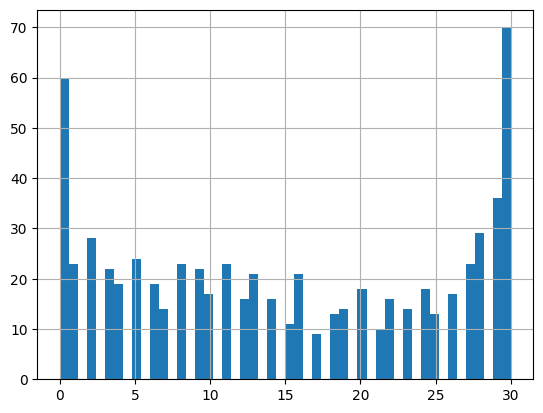

In [12]:
df_todo.dropna(axis=1).astype(float).idxmax().hist(bins=50)
pyplot.title("Correlación cruzada entre Flujo de aire y t° metal blanco")
pyplot.xlabel("Lag")
pyplot.ylabel("Conteo de repeticiones")

<Axes: >

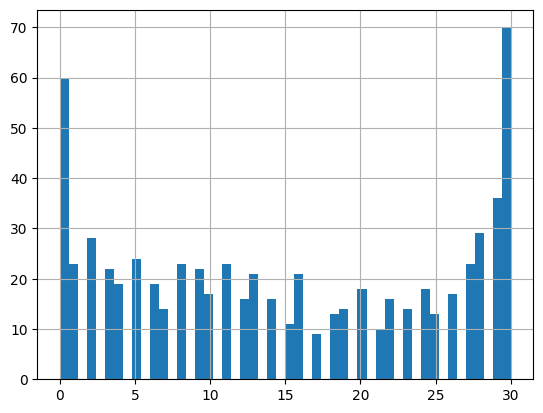

In [36]:
df_todo.dropna(axis=1).astype(float).idxmax().hist(bins=50)

In [37]:
### por dia

In [38]:
lag = 30
df_todo = DataFrame(DataFrame(index=range(0, lag+1)))
for dias in df_2021_2023['TimeStamp_2'].unique():
    df = df_2021_2023[df_2021_2023['TimeStamp_2'] == dias]
    serie1 = df.loc[:,'Flujo aire']#Alimentacion_con
    serie2 = df.loc[:,'t MB']
    df_lags = df_lag(lag, serie1, serie2)
    #
    df_lags.rename(columns={'Cross-Correlation':dias}, inplace=True)
    df_todo = pd.concat([df_todo, df_lags], axis=1)
    #df_todo[dias] = df_lags['Cross-Correlation']

In [39]:
df_todo.dropna(axis=1)

,28-07-2021,29-07-2021,30-07-2021,31-07-2021,01-08-2021,02-08-2021,03-08-2021,04-08-2021,05-08-2021,06-08-2021,...,31-05-2023,03-06-2023,04-06-2023,05-06-2023,06-06-2023,07-06-2023,08-06-2023,09-06-2023,10-06-2023,11-06-2023
0,0.617242,-0.250156,0.497281,-0.15415,-0.189436,0.230737,0.084045,0.029215,-0.158501,0.885381,...,0.730178,-0.056776,-0.003187,0.578461,0.001881,-0.323714,-0.459139,0.445336,-0.338419,0.090451
1,0.615377,-0.260138,0.491225,-0.15488,-0.187373,0.236432,0.082701,0.038281,-0.15796,0.884732,...,0.725335,-0.053474,-0.002617,0.579992,0.012656,-0.32643,-0.465863,0.454387,-0.323342,0.084789
2,0.613147,-0.253966,0.493163,-0.156052,-0.196578,0.24679,0.085895,0.048665,-0.15599,0.884148,...,0.719375,-0.052374,0.004458,0.576148,0.0164,-0.324903,-0.471724,0.443139,-0.316081,0.078518
3,0.610706,-0.252484,0.485967,-0.156509,-0.194728,0.260997,0.087599,0.057411,-0.151371,0.884342,...,0.714886,-0.058773,0.004125,0.58367,0.017582,-0.324849,-0.479033,0.447141,-0.500845,0.06094
4,0.60808,-0.254149,0.479884,-0.156532,-0.193758,0.280296,0.090182,0.067459,-0.14809,0.884432,...,0.708934,-0.059337,0.000076,0.583167,0.012983,-0.300731,-0.485402,0.471513,-0.637416,0.043058
5,0.6051,-0.258105,0.478287,-0.156084,-0.191264,0.312823,0.225758,0.07773,-0.144913,0.88508,...,0.702863,-0.060381,0.008077,0.604431,0.023392,-0.298489,-0.48781,0.460296,-0.624361,0.025019
6,0.601589,-0.266158,0.47418,-0.155131,-0.191304,0.379913,0.223685,0.087349,-0.138265,0.885469,...,0.697031,-0.060869,0.014333,0.595053,0.026891,-0.303209,-0.495204,0.457164,-0.613377,0.007022
7,0.598101,-0.257926,0.469204,-0.154804,-0.190644,0.37823,0.221617,0.096685,-0.133855,0.885383,...,0.690948,-0.061827,-0.00275,0.585969,0.026322,-0.308547,-0.501998,0.451315,-0.601556,-0.011412
8,0.592619,-0.257152,0.466644,-0.154338,-0.183932,0.376774,0.219541,0.107666,-0.129188,0.886044,...,0.68502,-0.060496,0.006176,0.578655,0.029155,-0.310122,-0.506855,0.501414,-0.591746,-0.030141
9,0.584596,-0.257705,0.467224,-0.154409,-0.189178,0.375215,0.217468,0.118839,-0.128281,0.881851,...,0.679389,-0.065939,0.009732,0.576742,0.037568,-0.308708,-0.511016,0.47849,-0.577835,-0.048896


<Axes: >

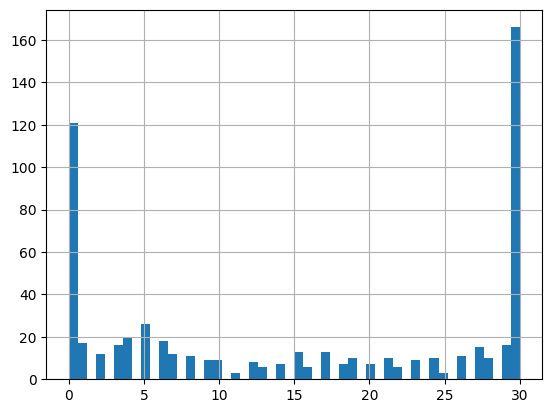

In [40]:
df_todo.dropna(axis=1).astype(float).idxmax().hist(bins=50)

In [ ]:
# datos con temperaturas ordenadas

In [88]:
df_1 = pd.read_csv('documentos/completos/actualizado/df_21_23_filtro_t.csv')

In [89]:
df_1

,Unnamed: 0,Timestamp,Flujo aire,enriquecimiento oxigeno,TASA_alimentacion_conc,alimentacion Si02,alimentacion carga fria,t MB,t ESC,TimeStamp_2,conc_s,conc_cu,MB_Cu,ESC_FE,O2_proporcion,proceso,Coef_O2
0,0,2021-07-01 00:05:00,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0.0,0,NaN
1,1,2021-07-01 00:10:00,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0.0,0,NaN
2,2,2021-07-01 00:15:00,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0.0,0,NaN
3,3,2021-07-01 00:20:00,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0.0,0,NaN
4,4,2021-07-01 00:25:00,0.0,21.0,0.0,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.0,0.0,74.309998,38.099998,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202655,206322,2023-06-20 13:40:00,0.0,21.0,0.0,0.002237,0.003333,0.000092,0.000092,20-06-2023,0.0,0.0,68.720001,17.100000,0.0,0,NaN
202656,206323,2023-06-20 13:45:00,0.0,21.0,0.0,0.002224,0.003468,0.000092,0.000092,20-06-2023,0.0,0.0,68.720001,17.100000,0.0,0,NaN
202657,206324,2023-06-20 13:50:00,0.0,21.0,0.0,0.002239,0.003187,0.000092,0.000092,20-06-2023,0.0,0.0,68.720001,17.100000,0.0,0,NaN
202658,206325,2023-06-20 13:55:00,0.0,21.0,0.0,0.002208,0.003252,0.000092,0.000092,20-06-2023,0.0,0.0,68.720001,17.100000,0.0,0,NaN


In [77]:
df_1.columns

Index(['Unnamed: 0', 'Timestamp', 'Flujo aire', 'enriquecimiento oxigeno',
       'TASA_alimentacion_conc', 'alimentacion Si02',
       'alimentacion carga fria', 't MB', 't ESC', 'TimeStamp_2', 'conc_s',
       'conc_cu', 'MB_Cu', 'ESC_FE', 'O2_proporcion', 'proceso', 'Coef_O2'],
      dtype='object')

In [5]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

In [98]:
def df_lag(max_lag, serie1, serie2):
    cross_corr_results = DataFrame(index=range(0, max_lag+1), columns=['Cross-Correlation'])
    for lag in range(0, max_lag+1):
        shifted_other_series = serie2.shift(lag)
        cross_corr = serie1.corr(shifted_other_series)
        cross_corr_results.loc[lag] = cross_corr
    return cross_corr_results

In [99]:
lag = 60
df_todo = DataFrame(DataFrame(index=range(0, lag+1)))
for dias in np.delete(df_1['proceso'].unique(), 0):
    df = df_1[df_1['proceso'] == dias]
    serie1 = df.loc[:,'Coef_O2']#Alimentacion_con
    serie2 = df.loc[:,'t ESC']
    df_lags = df_lag(lag, serie1, serie2)
    #
    df_lags.rename(columns={'Cross-Correlation':dias}, inplace=True)
    df_todo = pd.concat([df_todo, df_lags], axis=1)
    #df_todo[dias] = df_lags['Cross-Correlation']

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-pack

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvalenci\AppData\Local\anaconda3\envs\SAM\Lib\site-p

In [100]:
df_todo

,6,7,8,9,10,11,12,13,14,15,...,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021
0,0.100139,-0.345468,0.003849,-0.08041,0.157973,0.607174,0.096555,0.044385,0.007137,-0.300665,...,0.084784,0.031833,0.026117,-0.144855,-0.800525,-0.102236,0.981414,0.706878,0.085269,-0.52066
1,0.065116,0.842888,-0.031517,-0.084961,0.22848,-0.92431,0.482361,0.012631,0.052805,-0.341344,...,0.071511,0.001344,0.037119,-0.094587,-0.504628,-0.056037,0.566712,0.906273,0.027234,-0.537743
2,0.144872,1.0,-0.05987,-0.117363,0.213565,-0.594358,0.377122,0.052717,0.053889,-0.173,...,0.079544,0.008896,0.044237,-0.137693,0.013916,-0.439865,-1.0,0.859041,0.050421,-0.610293
3,0.191029,NaN,-0.049222,-0.127891,0.266173,-0.985196,-0.508804,0.040835,0.080772,0.005991,...,0.057141,-0.042209,0.08915,-0.176176,0.470775,0.496547,NaN,0.603156,0.057247,-0.617891
4,0.168674,NaN,-0.040153,-0.132066,0.297049,1.0,-0.665862,0.312579,0.07756,0.093763,...,0.062018,-0.051905,0.057553,-0.088496,0.393594,0.027583,NaN,-0.233076,0.035109,-0.63337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-0.505894,NaN,-0.001294,0.116415,0.036525,NaN,NaN,NaN,NaN,NaN,...,0.130154,-0.270974,0.061518,-0.057753,NaN,NaN,NaN,NaN,NaN,NaN
57,-0.333593,NaN,-0.019762,0.120843,0.225777,NaN,NaN,NaN,NaN,NaN,...,0.096216,-0.254564,0.06218,-0.336778,NaN,NaN,NaN,NaN,NaN,NaN
58,-0.308318,NaN,-0.022941,0.113192,-0.12447,NaN,NaN,NaN,NaN,NaN,...,0.115955,-0.337042,0.077111,-0.606055,NaN,NaN,NaN,NaN,NaN,NaN
59,-0.288942,NaN,-0.011738,0.101021,-0.216267,NaN,NaN,NaN,NaN,NaN,...,0.088991,-0.341749,0.091827,-0.539867,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Frecuencia')

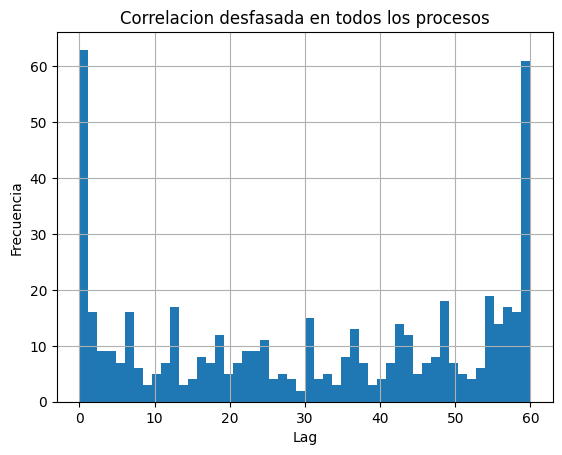

In [109]:
df_todo.dropna(axis=1).astype(float).idxmax().hist(bins=50)
pyplot.title("Correlacion desfasada en todos los procesos")
pyplot.xlabel("Lag")
pyplot.ylabel("Frecuencia")

In [ ]:
7 12 18

In [ ]:
35 min 1 hora 1.5 horas 

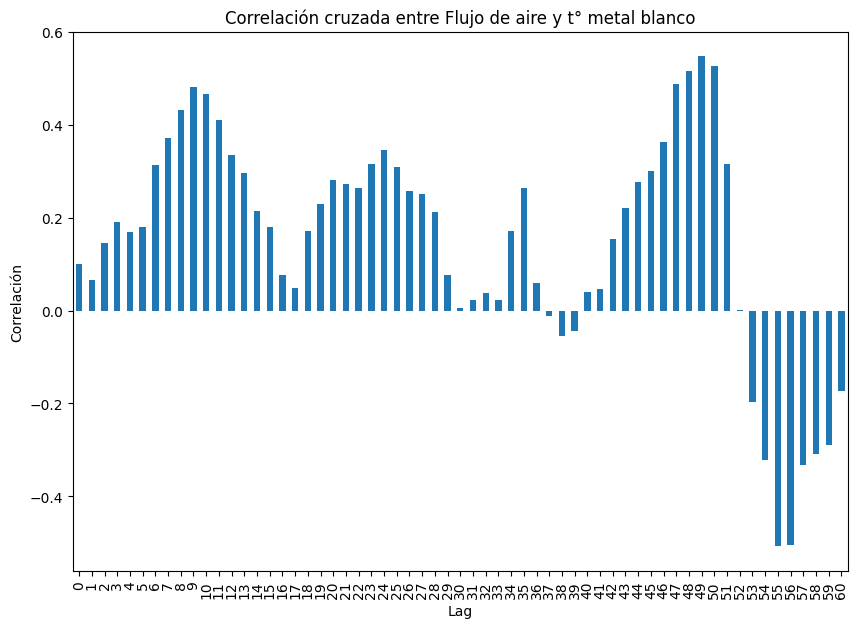

In [105]:
# Graficar la correlación cruzada
df_todo.loc[:,6].plot(kind='bar', ax=pyplot.gca(), figsize=(10,7))
pyplot.title("Correlación cruzada entre Flujo de aire y t° metal blanco")
pyplot.xlabel("Lag")
pyplot.ylabel("Correlación")
pyplot.show()

<Axes: ylabel='Count'>

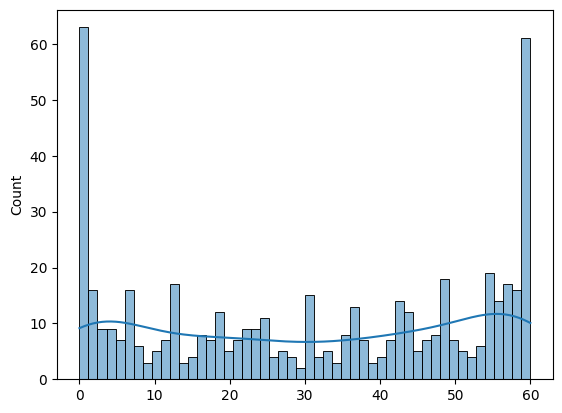

In [85]:
import seaborn as sns
sns.histplot(data=df_todo.dropna(axis=1).astype(float).idxmax(), kde=True, bins=50)

In [82]:
df_todo.dropna(axis=1).astype(float).idxmax()

6       49
8       18
9       41
10      19
16       0
        ..
1011    50
1012    53
1013    33
1014    35
1015    45
Length: 530, dtype: int64